In [1]:
import xarray as xr
import matplotlib.dates as mdates
import numpy as np
import matplotlib
from matplotlib import rcParams
import datetime
import pandas as pd
import cftime
import pylab as plt
import netCDF4 as nc
from numpy import ma
import dask as dd

In [2]:
from matplotlib.colors import LinearSegmentedColormap,ListedColormap
from matplotlib import cm
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

In [3]:
#Import data

map_443 = xr.open_dataarray('Data/u-bh443_oh_map.nc')


map_949 = xr.open_dataarray('Data/u-bl949_oh_map.nc')
tmean_949 = np.mean(map_949,axis=0)

In [4]:
# Calculate difference

map_diff = tmean_949-map_443

In [5]:
lat = map_443.latitude
lon = map_443.longitude

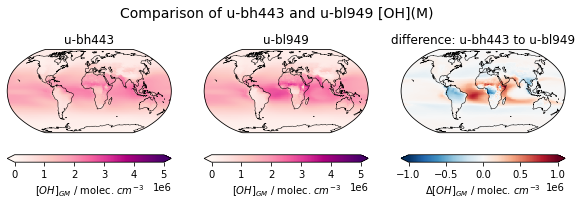

In [6]:
# Plot map of OH data for bh443

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3, figsize=(10,2.7), subplot_kw={"projection": ccrs.Robinson()})
fig.suptitle('Comparison of u-bh443 and u-bl949 [OH](M)',fontsize=14,y=1)

ax1.set_title('u-bh443')
ax1.coastlines(linewidth=0.5)
bh_cyclic, lon_plot = add_cyclic_point(map_443, coord=lon)   
c1 = ax1.pcolormesh(lon_plot,lat,bh_cyclic, cmap='RdPu',transform=ccrs.PlateCarree(central_longitude=0),vmin=0,vmax=5e6)
cb1 = fig.colorbar(c1, label= '$[OH]_{GM}$ / molec. $cm^{-3}$', orientation="horizontal",extend='both',ax=ax1)

ax2.set_title('u-bl949')
ax2.coastlines(linewidth=0.5)
bl_cyclic, lon_plot = add_cyclic_point(tmean_949, coord=lon)   
c2 = ax2.pcolormesh(lon_plot,lat,bl_cyclic, cmap='RdPu',transform=ccrs.PlateCarree(central_longitude=0),vmin=0,vmax=5e6)
cb2 = fig.colorbar(c2, label= '$[OH]_{GM}$ / molec. $cm^{-3}$', orientation="horizontal",extend='both',ax=ax2)

ax3.set_title('difference: u-bh443 to u-bl949')
ax3.coastlines(linewidth=0.5)
diff_cyclic, lon_plot = add_cyclic_point(map_diff, coord=lon)
c3 = ax3.pcolormesh(lon_plot,lat,diff_cyclic, cmap='RdBu_r',transform=ccrs.PlateCarree(central_longitude=0),vmin=-1e6,vmax=1e6)
cb2 = fig.colorbar(c3, label= '\u0394$[OH]_{GM}$ / molec. $cm^{-3}$', orientation="horizontal",extend='both',ax=ax3)

plt.savefig('figures/CombinedCompared.png',dpi=300)


Text(0.5, 1.0, 'u-bh443 to u-bl949 change')

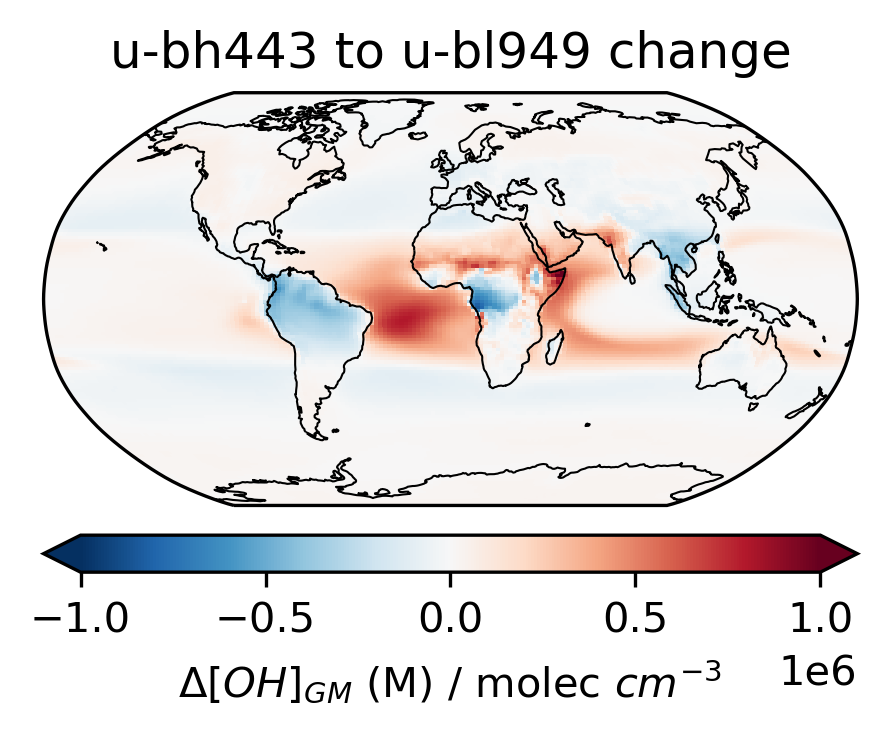

In [7]:
# Plot map of OH data for bh443

fig = plt.figure(figsize=(3.5,2.625), dpi=300)

ax = plt.axes(projection=ccrs.Robinson(central_longitude=0, globe=None))
ax.set_global()
ax.coastlines(linewidth=0.5)

diff_cyclic, lon_plot = add_cyclic_point(map_diff, coord=lon)   


plt.pcolormesh(lon_plot,lat,diff_cyclic, cmap='RdBu_r',transform=ccrs.PlateCarree(central_longitude=0),vmin=-1e6,vmax=1e6)

plt.colorbar(label = '\u0394$[OH]_{GM}$ (M) / molec $cm^{-3}$' ,orientation='horizontal',pad=0.05, extend='both')
plt.title('u-bh443 to u-bl949 change')

#plt.savefig('figures/diff_oh_map')

In [8]:
# Import GM OH values

gm_443 = xr.open_dataarray('Data/u-bh443_oh_gm.nc')
gm_949 = xr.open_dataarray('Data/u-bl949_oh_gm.nc')
time_949 = gm_949.time
time_443 = gm_443.time

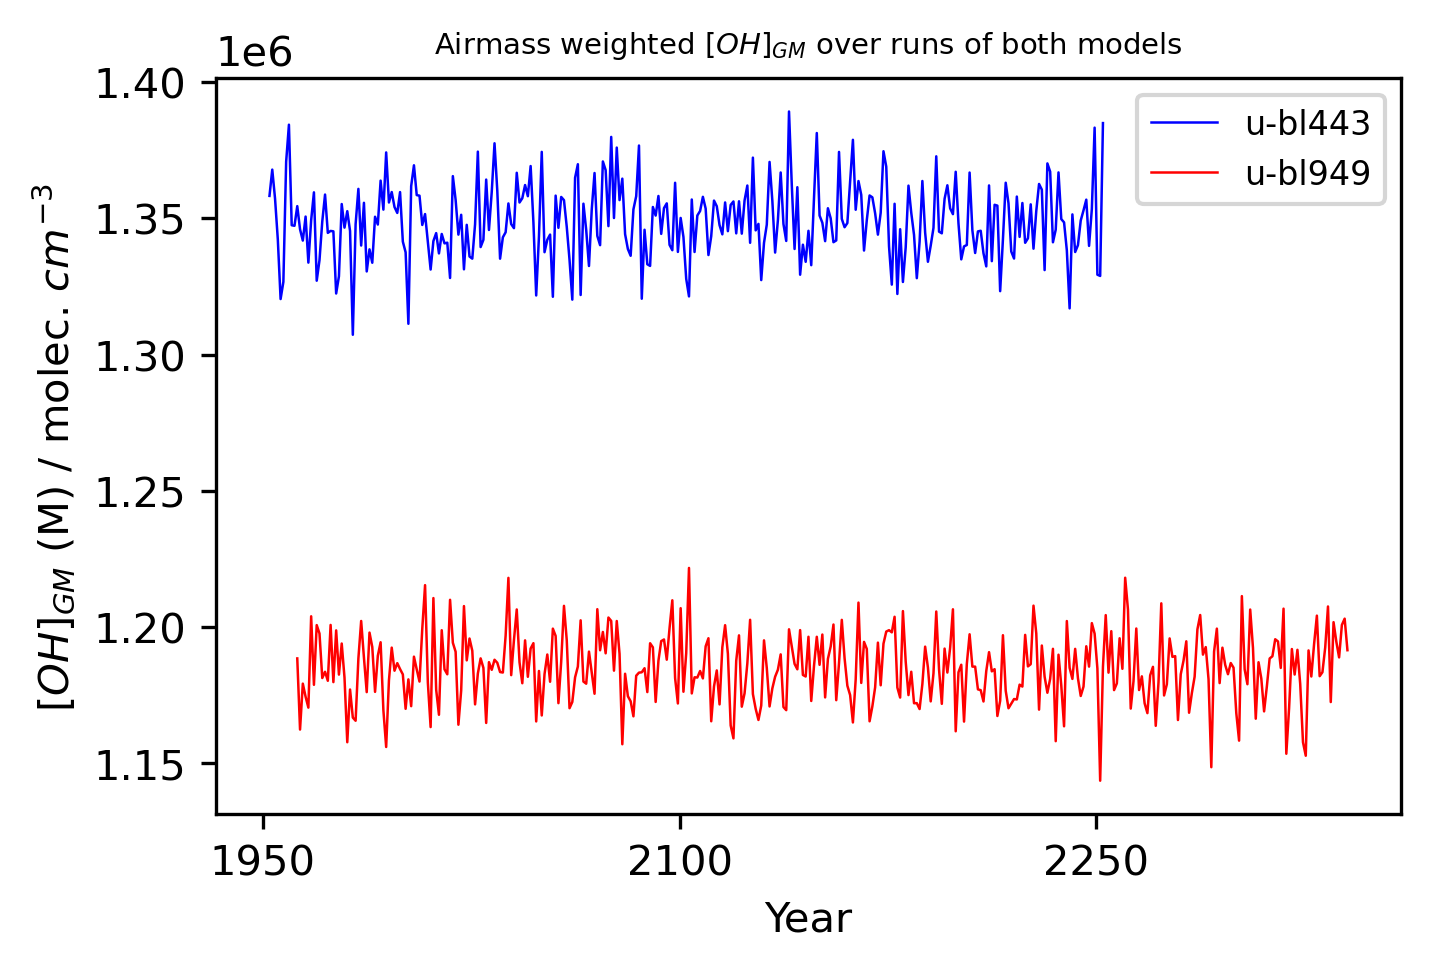

In [9]:
# Plot OH GM values on same plot

fig = plt.figure(figsize=(5.1,3.25), dpi=300)
ax = plt.axes()

ax.set_xlabel('Year')
ax.set_ylabel('$[OH]_{GM}$ (M) / molec. $cm^{-3}$')
plt.title('Airmass weighted $[OH]_{GM}$ over runs of both models', fontsize = 7)

ax.plot(time_443, gm_443, c='blue', linewidth=0.6,label='u-bl443')
ax.plot(time_949, gm_949, c='red', linewidth=0.6,label='u-bl949')
plt.legend(fontsize = 8)
plt.savefig('figures/oh_gm_on_same_plot_300y.png', dpi=300)

In [10]:
gm_diff = gm_443 - gm_949

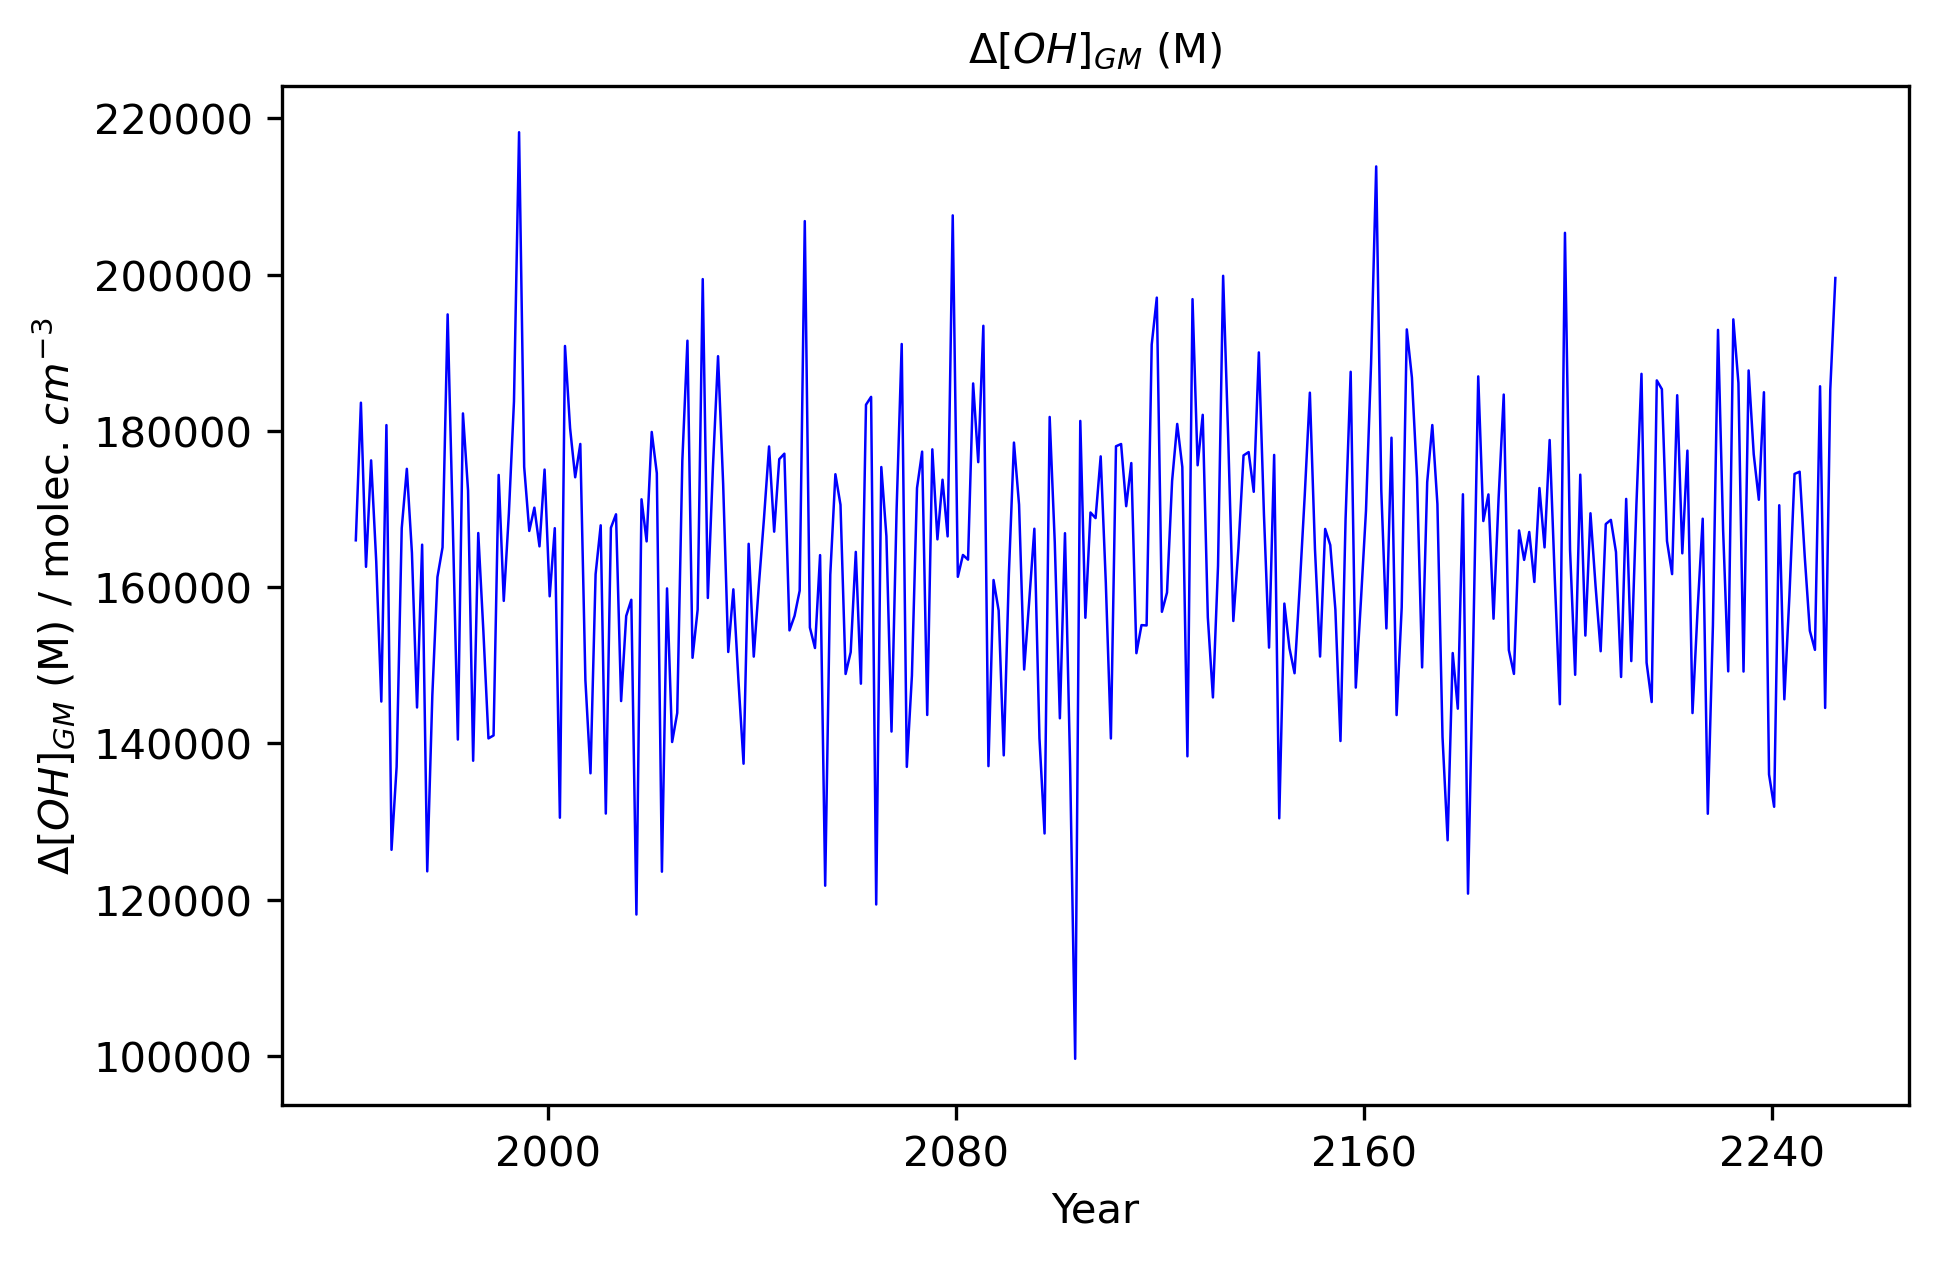

In [11]:
fig = plt.figure(figsize=(7,4.5), dpi=300)
ax = plt.axes()

ax.set_xlabel('Year')
ax.set_ylabel('\u0394$[OH]_{GM}$ (M) / molec. $cm^{-3}$')
plt.title('\u0394$[OH]_{GM}$ (M)', fontsize = 10)

ax.plot(gm_diff.time, gm_diff, c='blue', linewidth=0.6)
plt.savefig('figures/oh_gm_diff.png',dpi=300)

In [12]:
# Calculate gm_diff stats
plots = (gm_443,gm_949,gm_diff)

for model in plots:
    sig = np.std(model)
    mn = np.mean(model)
    percdev = (sig/mn)*100
    print(model.name,sig.data,mn.data,percdev.data)

oh_map_u-bh443 13715.528674977764 1349005.072620762 1.0167143885035286
oh_conc_gm_u-bl949 12636.21151722124 1184988.523366972 1.0663572910661858
None 18092.24089873005 164097.16727735623 11.025321886361777


In [13]:
# Whole atmosphere comparison

In [14]:
# Import GM OH values

gm_443 = xr.open_dataarray('u-bh443_total_atmos.nc')
gm_949 = xr.open_dataarray('u-bl949_total_atmos.nc')
time_949 = gm_949.time
time_443 = gm_443.time

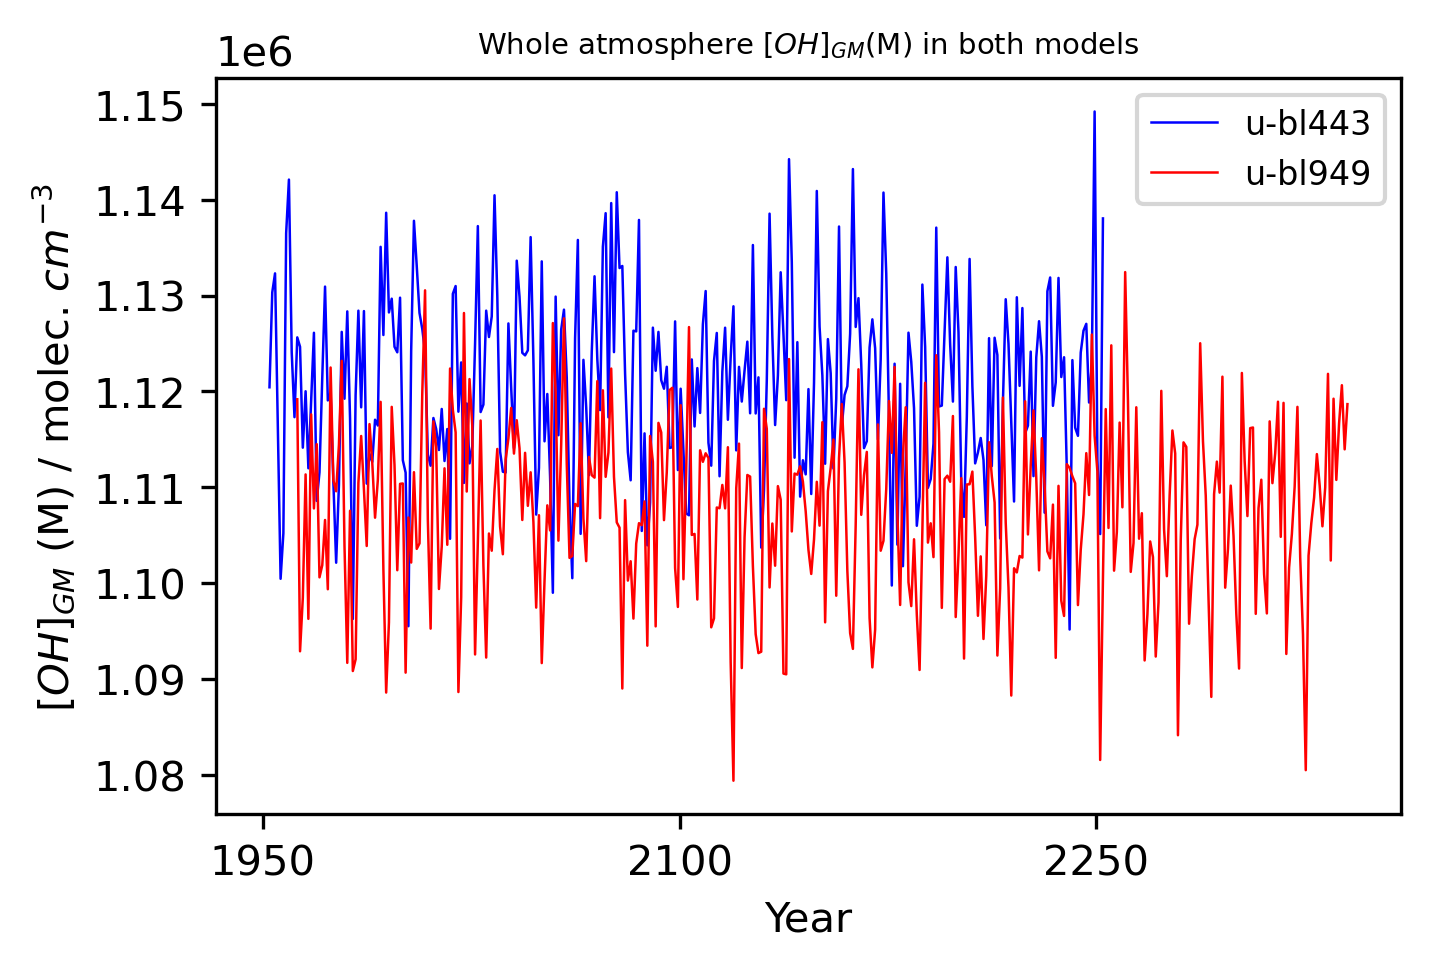

In [18]:
# Plot OH GM values on same plot

fig = plt.figure(figsize=(5.1,3.25), dpi=300)
ax = plt.axes()

ax.set_xlabel('Year')
ax.set_ylabel('$[OH]_{GM}$ (M) / molec. $cm^{-3}$')
plt.title('Whole atmosphere $[OH]_{GM}$(M) in both models', fontsize = 7)

ax.plot(time_443, gm_443, c='blue', linewidth=0.6,label='u-bl443')
ax.plot(time_949, gm_949, c='red', linewidth=0.6,label='u-bl949')
plt.legend(fontsize = 8)
plt.savefig('figures/whole_atmos_oh.png', dpi=300)

In [16]:
gm_diff = gm_443 - gm_949

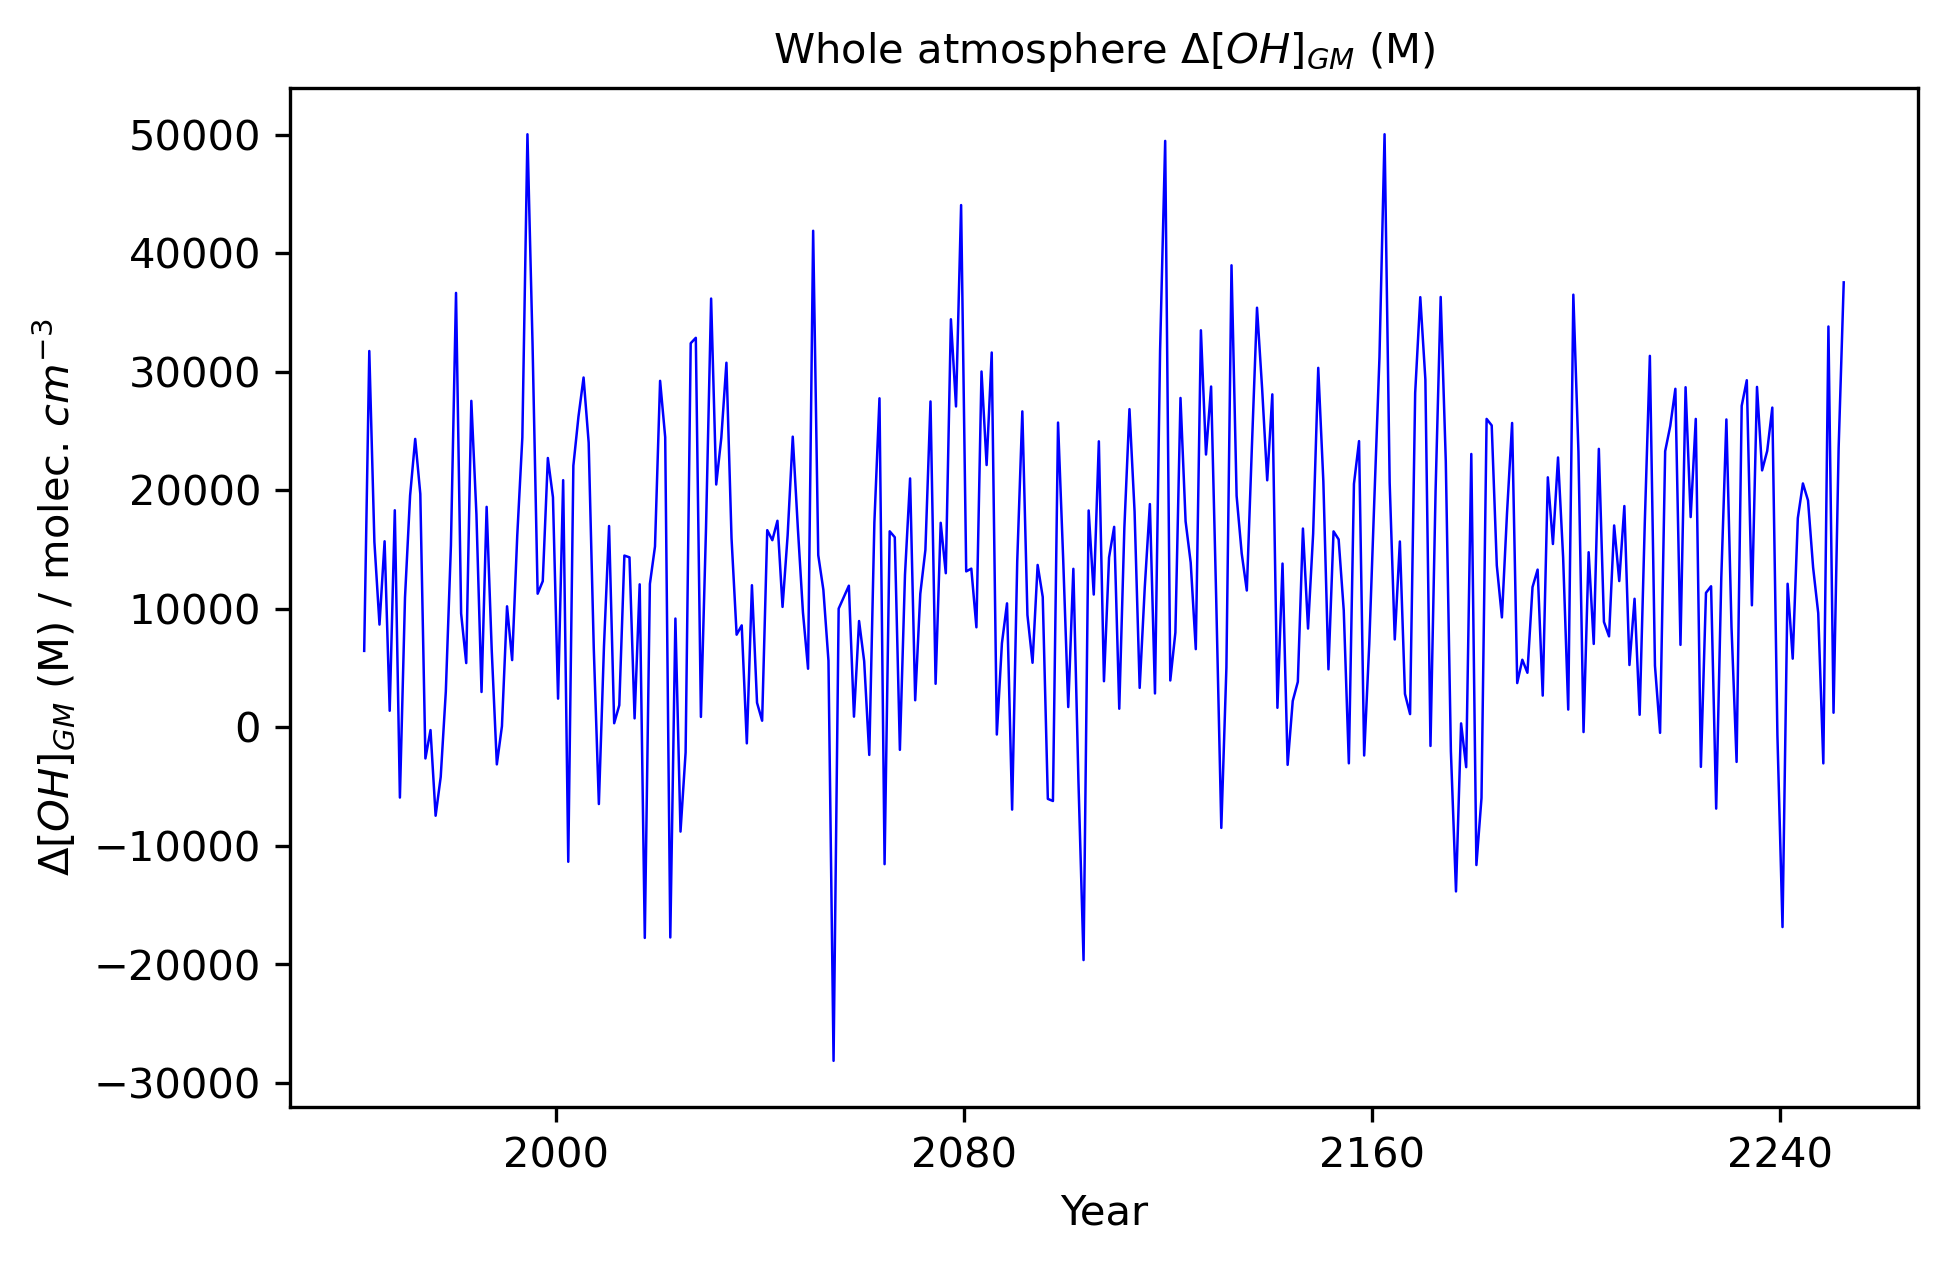

In [20]:
fig = plt.figure(figsize=(7,4.5), dpi=300)
ax = plt.axes()

ax.set_xlabel('Year')
ax.set_ylabel('\u0394$[OH]_{GM}$ (M) / molec. $cm^{-3}$')
plt.title('Whole atmosphere \u0394$[OH]_{GM}$ (M)', fontsize = 10)

ax.plot(gm_diff.time, gm_diff, c='blue', linewidth=0.6)
plt.savefig('figures/whole_atmos_diff_oh.png',dpi=300)